<a href="https://colab.research.google.com/github/mohammedbasithpm964/Al-ML-Tasks-and-Projects/blob/main/Airlines_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset=pd.read_csv("/content/Invistico_Airline.csv")

In [5]:
dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86269,Male,Loyal Customer,53,Business travel,Business,2198,3,5,5,5,...,3,3,3,3,1,3,1,0,8.0,dissatisfied
86270,Male,Loyal Customer,45,Business travel,Business,66,3,4,4,4,...,3,3,3,3,4,3,4,0,0.0,dissatisfied
86271,Male,Loyal Customer,22,Business travel,Eco,1343,3,2,3,2,...,3,4,3,4,4,4,3,0,2.0,dissatisfied
86272,Male,Loyal Customer,22,Business travel,Eco Plus,3289,3,2,2,2,...,3,2,4,2,2,4,3,3,0.0,dissatisfied


In [6]:
# Step 1: Split columns by data type
object_cols = dataset.select_dtypes(include=['object'])
float_cols = dataset.select_dtypes(include=['float64'])
int_cols = dataset.select_dtypes(include=['int64'])

In [7]:
object_cols

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Personal Travel,Eco,satisfied
1,Male,Loyal Customer,Personal Travel,Business,satisfied
2,Female,Loyal Customer,Personal Travel,Eco,satisfied
3,Female,Loyal Customer,Personal Travel,Eco,satisfied
4,Female,Loyal Customer,Personal Travel,Eco,satisfied
...,...,...,...,...,...
86269,Male,Loyal Customer,Business travel,Business,dissatisfied
86270,Male,Loyal Customer,Business travel,Business,dissatisfied
86271,Male,Loyal Customer,Business travel,Eco,dissatisfied
86272,Male,Loyal Customer,Business travel,Eco Plus,dissatisfied


In [8]:
int_cols

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86269,53,2198,3,5,5,5,4,3,3,3,3,3,3,1,3,1,0
86270,45,66,3,4,4,4,2,3,3,3,3,3,3,4,3,4,0
86271,22,1343,3,2,3,2,3,3,3,3,4,3,4,4,4,3,0
86272,22,3289,3,2,2,2,3,3,3,3,2,4,2,2,4,3,3


In [9]:
float_cols

,Arrival Delay in Minutes
0,0.0
1,305.0
2,0.0
3,0.0
4,0.0
...,...
86269,8.0
86270,0.0
86271,2.0
86272,0.0


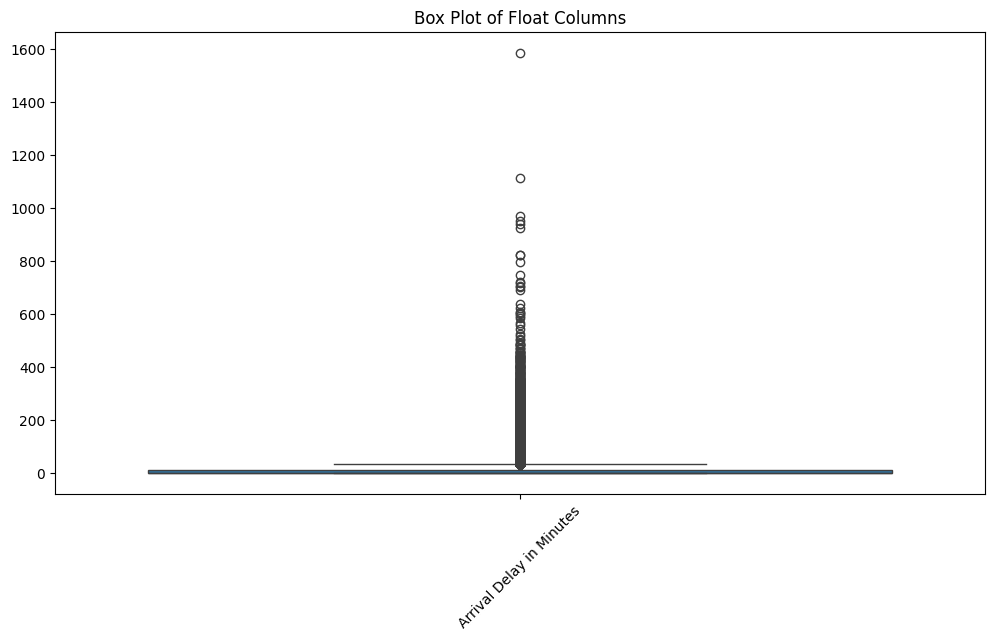

In [10]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

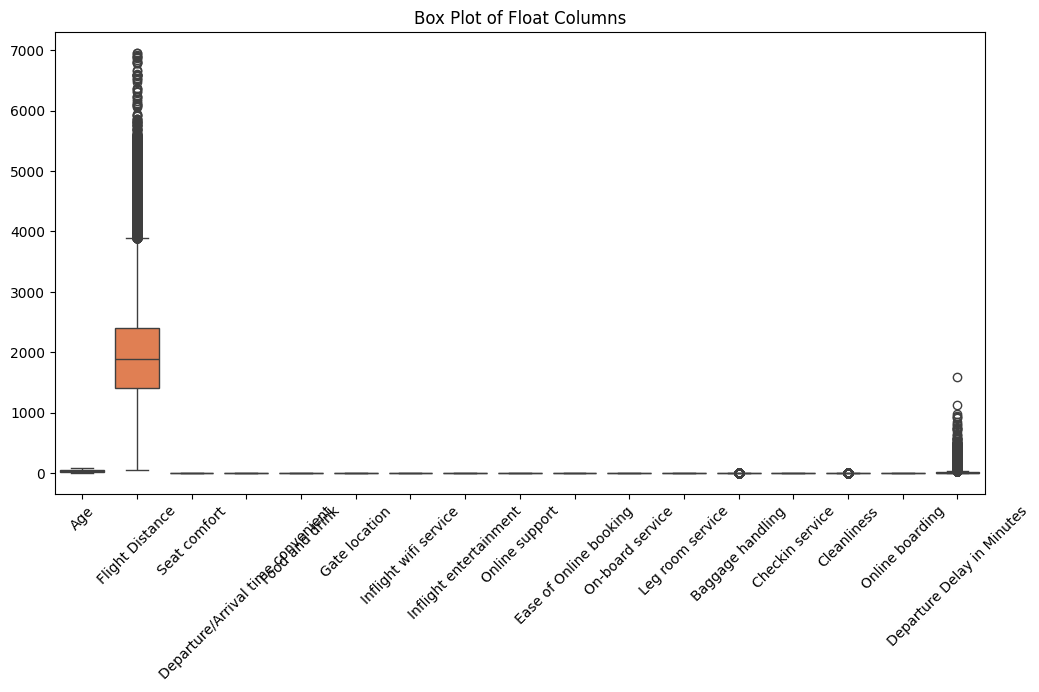

In [11]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=int_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [12]:
# Detect Outliers using IQR
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [13]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                          Outlier Count
Arrival Delay in Minutes          11291


In [14]:
# Define function to cap outliers
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values beyond the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [15]:
# Apply function to replace outliers
float_cols = cap_outliers(float_cols)

In [16]:
# Detect Outliers using IQR
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [17]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                          Outlier Count
Arrival Delay in Minutes              0


In [18]:
# Detect Outliers using IQR
outlier_counts = {}
for col in int_cols.columns:
    Q1 = int_cols[col].quantile(0.25)
    Q3 = int_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((int_cols[col] < lower_bound) | (int_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [19]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                                   Outlier Count
Age                                            0
Flight Distance                             2499
Seat comfort                                   0
Departure/Arrival time convenient              0
Food and drink                                 0
Gate location                                  0
Inflight wifi service                          0
Inflight entertainment                         0
Online support                                 0
Ease of Online booking                         0
On-board service                               0
Leg room service                               0
Baggage handling                            6430
Checkin service                                0
Cleanliness                                 6279
Online boarding                                0
Departure Delay in Minutes                 11897


In [20]:
# Define function to cap outliers
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values beyond the bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [21]:
# Apply function to replace outliers
int_cols = cap_outliers(int_cols)

In [22]:
# Detect Outliers using IQR
outlier_counts = {}
for col in int_cols.columns:
    Q1 = int_cols[col].quantile(0.25)
    Q3 = int_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((int_cols[col] < lower_bound) | (int_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [23]:
# Display Outlier Counts
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                                   Outlier Count
Age                                            0
Flight Distance                                0
Seat comfort                                   0
Departure/Arrival time convenient              0
Food and drink                                 0
Gate location                                  0
Inflight wifi service                          0
Inflight entertainment                         0
Online support                                 0
Ease of Online booking                         0
On-board service                               0
Leg room service                               0
Baggage handling                               0
Checkin service                                0
Cleanliness                                    0
Online boarding                                0
Departure Delay in Minutes                     0


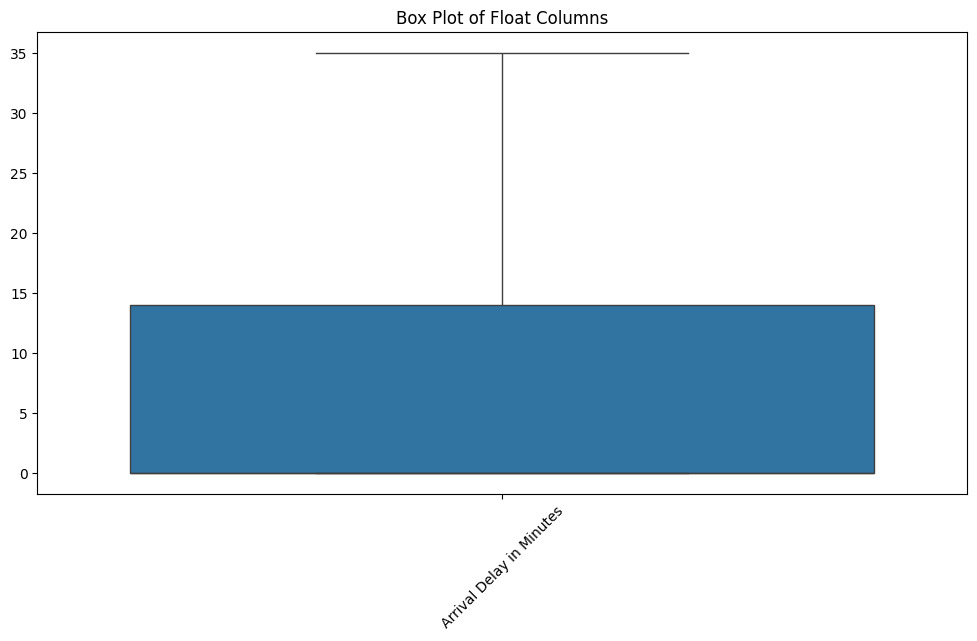

In [24]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

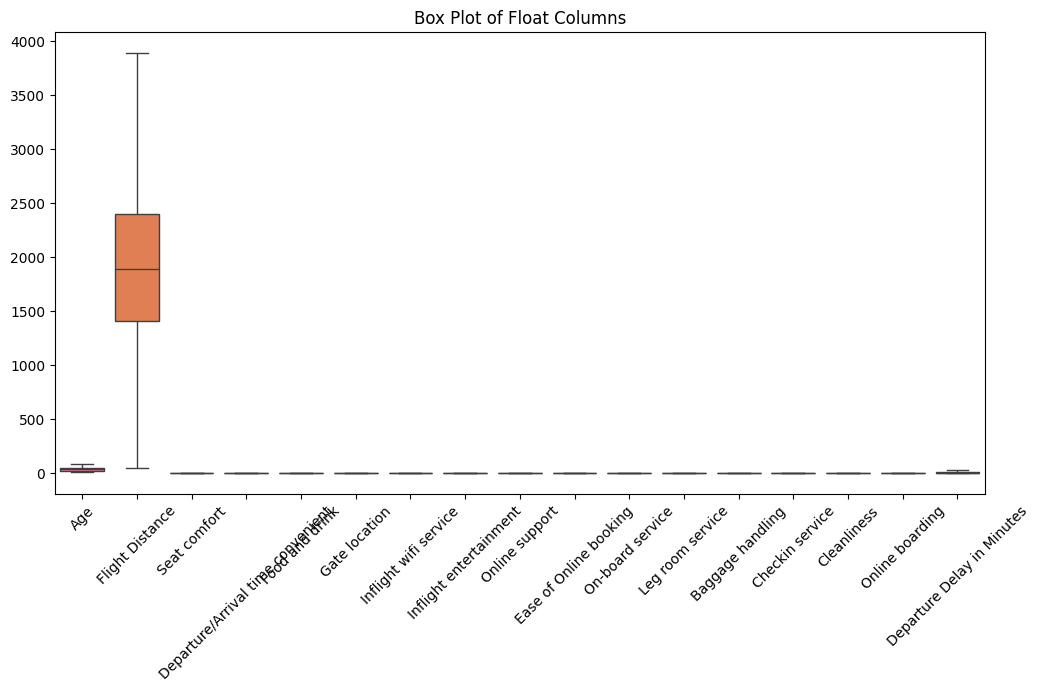

In [25]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=int_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [26]:
object_cols.isnull().sum()

,0
Gender,0
Customer Type,0
Type of Travel,0
Class,0
satisfaction,1


In [27]:
int_cols.isnull().sum()

,0
Age,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0
Inflight wifi service,0
Inflight entertainment,0
Online support,0
Ease of Online booking,0


In [28]:
object_cols.mode()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Business travel,Eco,dissatisfied


In [29]:
object_cols.fillna(object_cols.mode().iloc[0], inplace=True)

In [30]:
object_cols.isnull().sum()

,0
Gender,0
Customer Type,0
Type of Travel,0
Class,0
satisfaction,0


In [31]:
float_cols.isnull().sum()

,0
Arrival Delay in Minutes,266


In [32]:
# If float_cols was a NumPy array after transformation
colname = list(float_cols.columns)  # Restore original column names

In [33]:
colname

['Arrival Delay in Minutes']

In [34]:
from sklearn.impute import KNNImputer
float_cols# Initialize KNN Imputer (n_neighbors=3 means it will consider 3 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)

In [35]:
# Fit and transform the selected columns
float_cols = imputer.fit_transform(float_cols)

In [36]:
float_cols

array([[ 0.        ],
       [35.        ],
       [ 0.        ],
       ...,
       [ 2.        ],
       [ 0.        ],
       [ 8.66763557]])

In [37]:
float_cols = pd.DataFrame(float_cols,columns=colname)  # Convert to DataFrame if needed
float_cols.isnull().sum()

,0
Arrival Delay in Minutes,0


In [38]:
float_cols

,Arrival Delay in Minutes
0,0.000000
1,35.000000
2,0.000000
3,0.000000
4,0.000000
...,...
86269,8.000000
86270,0.000000
86271,2.000000
86272,0.000000


In [39]:
object_cols

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Female,Loyal Customer,Personal Travel,Eco,satisfied
1,Male,Loyal Customer,Personal Travel,Business,satisfied
2,Female,Loyal Customer,Personal Travel,Eco,satisfied
3,Female,Loyal Customer,Personal Travel,Eco,satisfied
4,Female,Loyal Customer,Personal Travel,Eco,satisfied
...,...,...,...,...,...
86269,Male,Loyal Customer,Business travel,Business,dissatisfied
86270,Male,Loyal Customer,Business travel,Business,dissatisfied
86271,Male,Loyal Customer,Business travel,Eco,dissatisfied
86272,Male,Loyal Customer,Business travel,Eco Plus,dissatisfied


In [40]:
dataset=pd.get_dummies(dataset,drop_first=True, dtype=int)

In [41]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

# Assuming 'satisfaction' was a categorical column and was one-hot encoded
# Check the new columns created by get_dummies
print(dataset.columns)

# Drop the one-hot encoded columns related to 'satisfaction'
# Replace 'satisfaction_satisfied', 'satisfaction_neutral or dissatisfied' with actual column names
X = dataset.drop(columns=['satisfaction_satisfied'])
y = dataset[['satisfaction_satisfied']] # Choose one of the encoded columns as target
# If you want a multi class then keep both target variables and change the model selection as well.

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Class_Eco Plus', 'satisfaction_satisfied'],
      dtype='object')


In [42]:
# prompt: implement decision tree algorithm on the above dataset

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.927267458707621
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     11031
           1       0.89      0.90      0.90      6224

    accuracy                           0.93     17255
   macro avg       0.92      0.92      0.92     17255
weighted avg       0.93      0.93      0.93     17255



In [43]:
# prompt: Implement Random forest on the above data set and give accuracy

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100) # You can adjust hyperparameters here

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9500434656621269
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11031
           1       0.96      0.90      0.93      6224

    accuracy                           0.95     17255
   macro avg       0.95      0.94      0.95     17255
weighted avg       0.95      0.95      0.95     17255



In [44]:
# prompt: implement SVC on the Above dataset

from sklearn.svm import SVC
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize the SVC classifier
svc_clf = SVC(random_state=42)  # You can adjust hyperparameters here

# Initialize SimpleImputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the classifier using the imputed data
svc_clf.fit(X_train_imputed, y_train.values.ravel()) # ravel y_train to handle a single column

# Make predictions on the test set using the imputed data
y_pred_svc = svc_clf.predict(X_test_imputed)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc}")

print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.6613155607070414
              precision    recall  f1-score   support

           0       0.67      0.93      0.78     11031
           1       0.60      0.19      0.28      6224

    accuracy                           0.66     17255
   macro avg       0.63      0.56      0.53     17255
weighted avg       0.64      0.66      0.60     17255



In [46]:
# prompt: implement LOgestic regression on the Above dataset

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Initialize the Logistic Regression model
logreg_clf = LogisticRegression(random_state=42, max_iter=1000) # You can adjust hyperparameters here, increased max_iter

# Initialize SimpleImputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the classifier using the imputed data
logreg_clf.fit(X_train_imputed, y_train.values.ravel()) # Use imputed data for training

# Make predictions on the test set using the imputed data
y_pred_logreg = logreg_clf.predict(X_test_imputed) # Use imputed data for prediction

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8022022602144306
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     11031
           1       0.76      0.66      0.71      6224

    accuracy                           0.80     17255
   macro avg       0.79      0.77      0.78     17255
weighted avg       0.80      0.80      0.80     17255



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# prompt: perform Linear Discriminant Analysis algorithm on the above dataset and give accuracy

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Initialize the Linear Discriminant Analysis model
lda_clf = LinearDiscriminantAnalysis()

# Initialize SimpleImputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the classifier using the imputed data
lda_clf.fit(X_train_imputed, y_train.values.ravel()) # Use imputed data for training


# Make predictions on the test set
y_pred_lda = lda_clf.predict(X_test_imputed) # Use imputed data for predictions

# Evaluate the model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Linear Discriminant Analysis Accuracy: {accuracy_lda}")

print(classification_report(y_test, y_pred_lda))

Linear Discriminant Analysis Accuracy: 0.8090988119385686
              precision    recall  f1-score   support

           0       0.82      0.89      0.86     11031
           1       0.77      0.66      0.72      6224

    accuracy                           0.81     17255
   macro avg       0.80      0.78      0.79     17255
weighted avg       0.81      0.81      0.81     17255



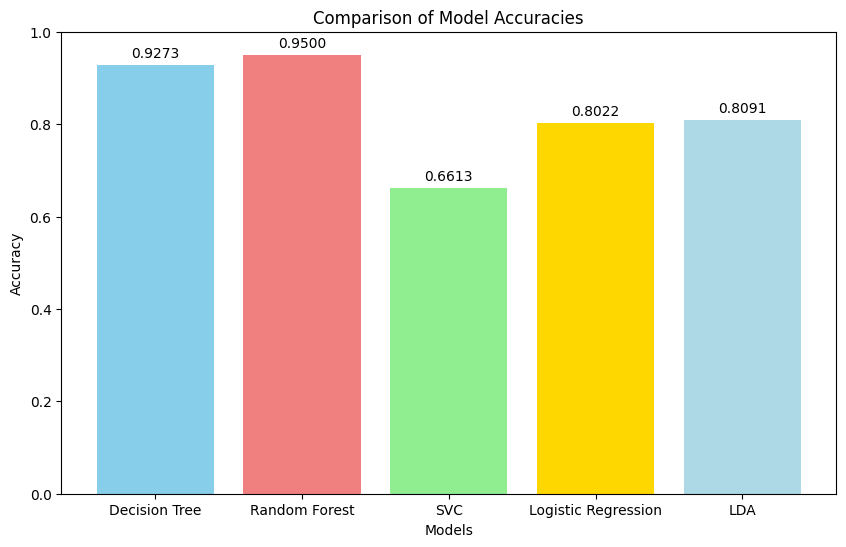

The best model is Random Forest with an accuracy of 0.9500


In [49]:
# prompt: based on the all the above algorithm and its accuracy provide a barchart individually and compare it and provide a best model via chart itself

import numpy as np
import matplotlib.pyplot as plt

# Accuracy scores from previous model evaluations
models = ['Decision Tree', 'Random Forest', 'SVC', 'Logistic Regression', 'LDA']
accuracies = [accuracy, accuracy_rf, accuracy_svc, accuracy_logreg, accuracy_lda]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightblue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom', fontsize=10) # Adjust fontsize as needed

plt.ylim(0, 1) # Set y-axis limit to 0-1 for accuracy
plt.show()

# Determine the best model based on accuracy
best_model_index = np.argmax(accuracies)
best_model = models[best_model_index]
best_accuracy = accuracies[best_model_index]

print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}")
